kidney single cell object to run this notebook can be downloaded from https://www.kidneycellatlas.org

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl


import os

#For editable text. Except latex text is still shapes
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style = "whitegrid", palette="pastel", color_codes=True)


# 02182021_suppFig9C_vizKidneyMarkers_STEWART.ipynb

In [4]:
# read in adata and normalize
adata = sc.read_h5ad("/Users/kayaneh/Documents/deconvolution/livertox/Mature_Full_v2.1.h5ad")
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)

In [5]:
cellObsLabel = "broad_celltype"

In [6]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 150, 
                bbox_inches = 'tight', transparent = True)

In [7]:
cell_pal = {'Connecting tubule': '#355070',
 'Epithelial progenitor cell': '#6d597a',
 'Intercalated cell': '#b56576',
 'Pelvic epithelium': '#e56b6f',
 'Podocyte': '#eaac8b',
 'Principal cell': '#7EBDC2',
 'Proximal tubule': '#729EA1',
 'Thick ascending limb of Loop of Henle': '#355070'}
cell_pal["Proximal tubule"] = "#62b6cb"
cell_pal["Podocyte"] = "#1b4965"

In [8]:
sns.color_palette(list(cell_pal.values()))

[(0.20784313725490197, 0.3137254901960784, 0.4392156862745098),
 (0.42745098039215684, 0.34901960784313724, 0.47843137254901963),
 (0.7098039215686275, 0.396078431372549, 0.4627450980392157),
 (0.8980392156862745, 0.4196078431372549, 0.43529411764705883),
 (0.10588235294117647, 0.28627450980392155, 0.396078431372549),
 (0.49411764705882355, 0.7411764705882353, 0.7607843137254902),
 (0.3843137254901961, 0.7137254901960784, 0.796078431372549),
 (0.20784313725490197, 0.3137254901960784, 0.4392156862745098)]

In [9]:
adata = adata[adata.obs[cellObsLabel].isin(list(cell_pal.keys())),:]

In [10]:
markers = pd.read_csv("~/Documents/deconvolution/figures/fig2/gini_distrib/gini6_perCluster_kidney_12072020.csv",
                     sep = ",", index_col = 0)
degDict = {}
for i in markers:
    cellName = i.split("-")[0]

    #if cellName == "Proximal tubule" or cellName == "Podocyte":
    if cellName == "Proximal tubule":
        print(cellName)
        degDict[cellName] = markers[i].dropna().index.tolist()

Proximal tubule


In [11]:
np.unique(adata.obs["broad_celltype"], return_counts = True)

(array(['Connecting tubule', 'Epithelial progenitor cell',
        'Intercalated cell', 'Pelvic epithelium', 'Podocyte',
        'Principal cell', 'Proximal tubule',
        'Thick ascending limb of Loop of Henle'], dtype=object),
 array([  157,   238,   829,   136,   126,    88, 28061,   675]))

In [12]:
degDict_genes = {}
for i in degDict:
    degDict_genes[i] = adata.var[adata.var["ID"].isin(degDict[i])].index.tolist()

In [13]:
allMarkers = list(degDict.values())
allMarkers = [j for sub in allMarkers for j in sub] 

In [14]:
# ID is the column of adata.var with the ENSG info
relAdata = adata[:,adata.var["ID"].isin(allMarkers)]



In [15]:
color_pal = {}
color_pal["Proximal tubule"] = cell_pal["Proximal tubule"]
color_pal["Podocyte"] = cell_pal["Podocyte"]

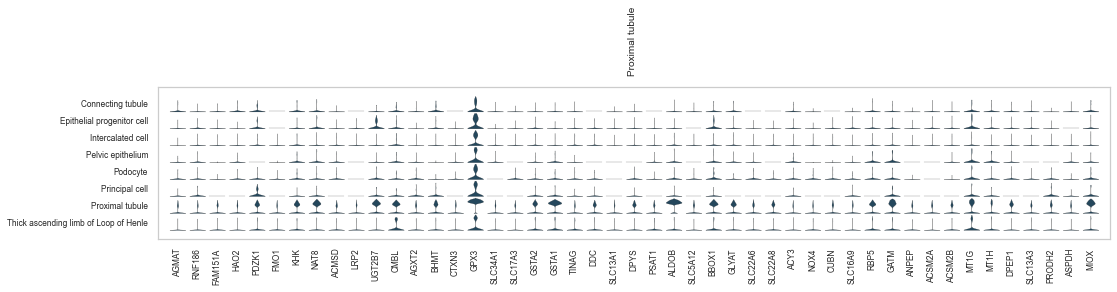

In [16]:
sc.pl.stacked_violin(relAdata, degDict_genes, 
                     groupby= cellObsLabel,
                     color = "#1b4965")
                    save = "kidney_signature_05102021.pdf")

In [17]:
clear all